# Fundamentos de Aprendizaje Automático y Reconocimiento de Patrones
***
# Práctico 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from utils.fuaa_utils import validar_resultado, visualizar_funcional
%matplotlib inline


OSError: [Errno 22] Invalid argument

In [ ]:
## Necesario para visualizar "Evolución de los pesos en descenso por gradiente"
!pip install ipympl
%matplotlib widget
#%matplotlib notebook
# Puede hacer falta instalar el paquete ipympl


## Objetivos

Los objetivos de este práctico son los siguientes:
    
- Implementar el método de **descenso por gradiente** para optimizar una función de costo. Identificar dificultades que pueden presentarse al utilizar el método de optimización y proponer estrategias que permitan mitigar las mismas.
- Implementar **regresión lineal** utilizando **descenso por gradiente** y **descenso por gradiente estocástico**. Comparar la evolución de las funciones de costo y los pesos en ambos casos. Analizar la conveniencia de aplicar uno u otro método. 
- Formular el método de clasificación **regresión logística** e implementarlo. 
- Aplicar el método de regresión logística para **clasificar entre especies de la flor de Iris**.
- Plantear el compromiso **sesgo-varianza** y evaluarlo en una situación en la que se quiere aprender a partir de pocos puntos.


*** 

## Lista de ejercicios

[Ejercicio 1](#Ejercicio1): descenso por gradiente de una función simple       
[Ejercicio 2](#Ejercicio2): regresión lineal mediante descenso por gradiente     
[Ejercicio 3](#Ejercicio3): regresión logística      
[Ejercicio 4](#Ejercicio4): compromiso sesgo varianza 

# Ejercicio 1: Descenso por gradiente en una función "simple"
<a id="Ejercicio1"></a>

Se considera la función $f(x,y)=x^2+2y^2+2\sin(2\pi x)2\sin(2\pi y)$

**(a)** Implementar descenso por gradiente para minimizar esta función. Considerar como condición inicial los valores $(x_0,y_0) = (0.1, 0.1)$. Utilizar como *learning rate* $\eta=0.1$ y como número máximo de iteraciones 50. Comentar cómo evoluciona el costo en función del número de iteraciones. ¿Qué sucede si se modifica el *learning rate*?

2.953306234351099
-0.9800000000000001 -0.9914996772653016
k es 1
2.949112960266121
-0.9737109954627291 -0.9931061748159141
k es 2
2.919132103391913
-0.9649715369939669 -1.0081997029016587
k es 3
2.462893534568019
-0.9330415897758084 -1.0703802871414396
k es 4
0.0749760475071044
-0.8162064910143858 -1.235344566236351
k es 5
-0.2560781121667972
-0.6987528459349349 -1.2078532939274527
k es 6
-0.3590331340929045
-0.7615403332309006 -1.2251465531373702
k es 7
-0.38453363101475846
-0.7283232808326804 -1.2148663849466286
k es 8
-0.3932318599948976
-0.747053489936764 -1.2212935708554002
k es 9
-0.3958488611001916
-0.7366896197789746 -1.2173702332999081
k es 10
-0.39671156011429076
-0.7425105609457476 -1.2197854333467686
k es 11
-0.3969829012221431
-0.7392704275543751 -1.21831312810216
k es 12
-0.3970709170036759
-0.7410812027671229 -1.2192105590113715
k es 13
-0.3970990224371094
-0.7400736192061144 -1.218666220719596
k es 14
-0.39710810020973897
-0.7406344900327204 -1.218995775370052
k es 15
-

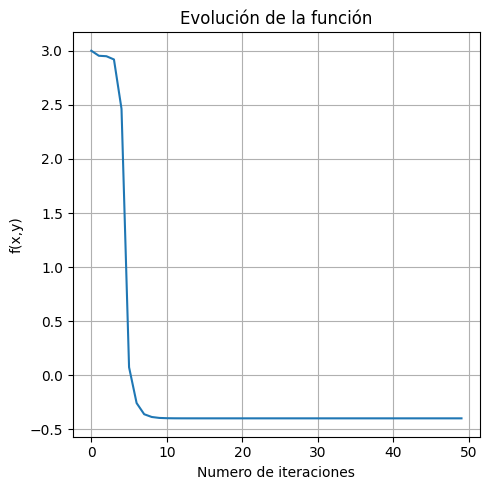

In [2]:
x0, y0 = -1, -1  # por defecto 0.1, 0.1
lr = 0.01  # por defecto 0.1
nIter = 50
fn = np.zeros(nIter)  # función de costo
x, y = x0, y0
n = 0

###################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

fn[0]=x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*2*np.sin(2*np.pi*y)
k=1
while k<nIter:
    x= x - (lr)*( 2*x + 4*np.sin(2*np.pi*y)*2*np.pi*np.cos(2*np.pi*x) )
    y= y - (lr)*( 4*y + 2*np.sin(2*np.pi*x)*4*np.pi*np.cos(2*np.pi*y) )
    fn[k]= x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*2*np.sin(2*np.pi*y)
    print(fn[k])
    print(x,y)
    print('k es',k)
    k=k+1
print('Fn:',fn)
minimo = np.min(fn)
print('minimo',minimo)
indice = np.where(fn==minimo)
print('indice:',indice)

###################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

plt.figure(figsize=(5, 5))
plt.plot(fn)
plt.title("Evolución de la función")
plt.xlabel("Numero de iteraciones")
plt.ylabel("f(x,y)")
plt.grid()
plt.tight_layout()

**Respuesta:**  
...

**(b)** Obtener las coordenadas del mínimo y su valor para las siguientes condiciones iniciales:

| Condición inicial | ( x, y )* | F* |
| ----------------- | ------ | ----- |
| (0.1, 0.1)        | -0.827160183038413 -0.17608751549725854       | -2.4180147315917906      |
| (1, 1)            | 0.21702012685837746 0.8171724832325191       | -2.188290095205539      | 
| (-0.5, -0.5)      | -0.3939798483023117 0.11284831846810306       | -1.42874      |
| (-1, -1) | -0.21702012685837746 -0.8171724832325191  | -2.188290095205539 |

**(c)** ¿Qué puede decir respecto a la función a optimizar y la técnica empleada?

True

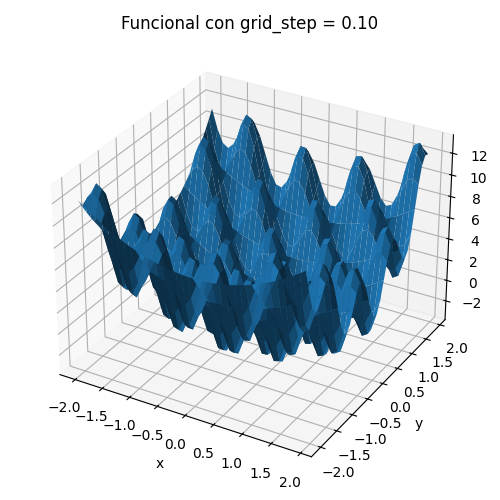

In [6]:
# Se grafica la función de costo para este caso. Recibe como parámetro el
# step de la grilla. La gráfica se puede rotar para ver mejor la
# superficie graficada.
visualizar_funcional(grid_step=0.1)

**Respuesta:**   
... 

# Ejercicio 2: Regresión lineal mediante descenso por gradiente
<a id="Ejercicio2"></a>

En este ejercicio se encontrarán los parámetros de una relación lineal entre dos variables unidimensionales utilizando descenso por gradiente y se lo comparará con el resultado obtenido mediante la solución cerrada vista en el práctico anterior. Para generar una relacion lineal rudiosa entre dos variables $x$ e $y$ se provee la función `generar_relacion_lineal_ruidosa(m, n, N, sigma)`. 

In [7]:
def generar_relacion_lineal_ruidosa(m, n, N, sigma):
    """
    Entrada:
        m: pendiente de la recta
        n: término independiente
        N: número de puntos a generar
        sigma: desviación estándar del ruido
    Salida:
        x: N valores aleatorios en el rango [-1,1]
        y: resultado de evaluar los N valores de x con el modelo ruidoso
    """
    x = 2 * np.random.rand(N) - 1
    senal = m * x + n
    ruido = sigma * np.random.randn(N)
    y = senal + ruido
    return x, y

La siguiente celda genera dos vectores $\mathbf{x}$, $\mathbf{y}$ y muestra la relación generada

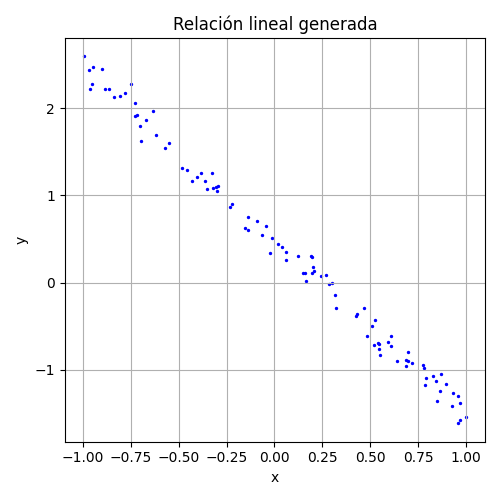

In [8]:
m = -2
n = 0.5
N = 100
sigma = 0.1
x, y = generar_relacion_lineal_ruidosa(m, n, N, sigma)

plt.figure(figsize=(5, 5))
plt.scatter(x, y, c="b", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Relación lineal generada")
plt.grid()
plt.tight_layout()

La función de costo que se minimiza mediante el método de mínimos cuadrados es:

$$
E_{in}(\mathbf{w}) = \frac{1}{2N}\sum_{n=1}^N \left( y_n - \mathbf{w}^T \mathbf{x}_n \right)^2
$$

**(a)** Encontrar los coeficientes del modelo utilizando la solución cerrada vista en el curso y verificar que los coeficientes obtenidos son similares a los utilizados para generar la señal. Recordar que en el modelo lineal el vector de características $\mathbf{x}_n$ se encuentra expresado en coordenadas homogéneas. 

In [9]:
###################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

# Matriz X utilizada en la solución cerrada
#PASO A HOMOGENEAS
X = np.ones((len(x),2))
X[:,0]=x

# Resultado de la solucion cerrada de la regresión lineal.
# w_ls = ...
xdaga = np.linalg.pinv(X)
w_ls = xdaga@y
xd2 = (np.linalg.inv(X.T@X))@X.T
w_d2 = xd2@y
print('m=',w_ls[0],'n=',w_ls[1])
print('m=',w_d2[0],'n=',w_d2[1])
print(xdaga[0,1:6])
print(xd2[0,1:6])
###################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

print("w_0  = (%.3f,%.3f)\nw_ls = (%.3f,%.3f)" % (n, m, w_ls[0], w_ls[1]))

m= -1.9941935382730276 n= 0.4831340450065069
m= -1.994193538273028 n= 0.48313404500650703
[-0.00257931 -0.02591191 -0.01260997 -0.00575364 -0.0171557 ]
[-0.00257931 -0.02591191 -0.01260997 -0.00575364 -0.0171557 ]
w_0  = (0.500,-2.000)
w_ls = (-1.994,0.483)


**Ej2 b)**  Calcular el gradiente de la función de costo respecto a los parámetros. 

**Respuesta:**

...

**(c)** Implementar el método `minimos_cuadrados_mediante_descenso_por_gradiente()` y utilizarlo para encontrar los coeficientes del modelo lineal. Notar que el resultado obtenido en la parte anterior utiliza todo el conjunto de entrenamiento para estimar el gradiente. Es por esta razón que a esta forma de calcular el gradiente se la suele llamar *Batch Gradient Descent*

In [10]:
def minimos_cuadrados_mediante_descenso_por_gradiente(X,
                                                      y,
                                                      lr=0.1,
                                                      max_iter=1000,
                                                      delta_w_minimo=1e-8):
    '''
    Entrada:
        
        X: arreglo de tamaño (N,(d+1)) donde cada fila representa una muestra
        y: arreglo de tamaño (N,) que contiene las etiquetas
        lr: learning rate
        max_iter: si el número de iteraciones alcanza a max_iter se detiene la optimización.
        delta_w_minimo: si la norma L2 del vector diferencia entre vectores de pesos de dos 
                       iteraciones consecutivas es menor que delta_w_minimo se detiene la optimización
                                  
    Salida:
        ws: lista de tamaño igual al número de iteraciones realizadas que contiene 
            los vectores de pesos encontrados durante el proceso de optimización 
    '''
    N = X.shape[0]
    d = X.shape[1]

    # se inicializan los pesos a valores aleatorios muy pequeños
    w = 1e-6 * np.random.randn(d)
    ws = [w.copy()]  # se inicializa la lista de pesos
    delta_w = delta_w_minimo + 1  # de esta forma entra seguro al menos una vez
    it = 0  # contador de iteraciones

    while (it < max_iter and delta_w > delta_w_minimo):
        ###################################################################
        ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
        ###################################################################
    #    X_t=np.transpose(X)
  #      X_tx=X_t @ X
   #     g_t=1/(2*N) * (X_tx @ w - X_t @ y)
 #       v_t=-g_t
#        w=w + lr*v_t
#        it = it+1
        grad= (1/N)*((X.T@X)@w.T-X.T@y.T)
        w= w- lr*grad.T
        delta_w = lr*np.linalg.norm(grad)
        it=it+1
        ws.append(w)
        ###################################################################
        ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
        ###################################################################
    print(
        "minimos_cuadrados_mediante_descenso_por_gradiente() terminó en la iteración %d"
        % it)
    ws = np.array(ws)

    return ws

In [11]:
# Se encuentran los coeficientes del modelo utilizando batch gradient descent
max_iter_BGD = 500
ws_bgd = minimos_cuadrados_mediante_descenso_por_gradiente(X, y, max_iter=max_iter_BGD)
w_bgd = ws_bgd[-1]
print("El w encontrado utilizando batch gradient descent es: ", w_bgd)

minimos_cuadrados_mediante_descenso_por_gradiente() terminó en la iteración 434
El w encontrado utilizando batch gradient descent es:  [-1.99419327  0.48313402]


## Descenso por gradiente estocástico

Cuando el conjunto de datos de entrenamiento es muy grande, el descenso por gradiente recientemente implementado presenta la desventaja de ser muy lento. Es por eso que en la práctica es muy habitual utilizar una variante llamada *descenso por gradiente estocástico*. En la misma se calcula el gradiente utilizando una sola muestra. 

**(d)** Implementar `minimos_cuadrados_mediante_descenso_por_gradiente_estocastico()` y utilizarla para encontrar los coeficientes del modelo lineal.

In [12]:
def minimos_cuadrados_mediante_descenso_por_gradiente_estocastico(
    X, y, lr=0.1, max_epocas=1000, delta_w_minimo=1e-8
):
    """
    Entrada:

        X: matriz de tamaño Nx(d+1) donde cada fila representa una muestra
        y: vector de tamaño N que contiene las etiquetas
        lr: learning rate
        max_epocas: si el número de épocas alcanza a max_epocas se detiene la optimización.
                    Se llama una época a una pasada completa por el conjunto de
                    entrenamiento.
        delta_w_minimo: si la norma L2 del vector diferencia entre vectores de pesos de dos
                        épocas consecutivos es menor que delta_w_minimo se detiene la optimización

    Salida:
        ws: lista de tamaño igual al número de iteraciones realizadas que contiene los pesos de cada
            iteración
    """

    N = X.shape[0]

    # se inicializan los pesos a valores aleatorios muy pequeños
    w = 1e-6 * np.random.randn(X.shape[1])
    ws = [w.copy()]  # se inicializa la lista de pesos
    delta_w = delta_w_minimo + 1  # de esta forma entra seguro al menos una vez
    epoca_actual = 0  # contador de épocas

    while (epoca_actual < max_epocas) and (delta_w > delta_w_minimo):

        ###################################################################
        ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
        ###################################################################

        # se guarda el w de la época anterior
        w_= w

        # se sortea el orden en que se visitan las muestras
        # sugerencia: utilizar permutation() del paquete random
        indices = np.random.permutation(len(X[:,0]))
        for i in indices:
            # se calcula el gradiente
            gt = ( w.T @ X[i,:]- y[i] )
            gt = gt * X[i,:]

            # se actualiza w
            w = w - lr*gt

            # se almacena el nuevo w
            ws.append(w)
        
        # al terminar la época se calcula el delta_w
        delta_w = np.linalg.norm(w_ - w)

        # se incrementa el valor de la época
        epoca_actual = epoca_actual+1
        
        ###################################################################
        ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
        ###################################################################

    print(
        "minimos_cuadrados_mediante_descenso_por_gradiente_estocastico() terminó en la época %d"
        % epoca_actual
    )
    ws = np.array(ws)

    return ws

In [13]:
# Se define el número máximo de épocas en descenso por gradiente
# estocástico de forma tal que el número de actualizaciones de los
# pesos sea similar a la de batch gradient descent. Recordar que
# en una época se realizan N actualizaciones de los pesos.
#max_iter_BGD=500
max_epocas_SGD = np.max([max_iter_BGD // N, 1])

ws_sgd = minimos_cuadrados_mediante_descenso_por_gradiente_estocastico(
    X, y, max_epocas=max_epocas_SGD
)
w_sgd = ws_sgd[-1]
print("El w encontrado utilizando batch gradient descent es: ", w_sgd)

minimos_cuadrados_mediante_descenso_por_gradiente_estocastico() terminó en la época 5
El w encontrado utilizando batch gradient descent es:  [-1.97117807  0.4555002 ]


## Evolución del costo en descenso por gradiente

**(e)** Implementar la función `evolucion_costo_descenso_por_gradiente()` y utilizarla para mostrar las curvas de error en ambos casos. ¿Qué similitudes y diferencias nota entre las curvas obtenidas por ambos métodos?

In [14]:
def evolucion_costo_descenso_por_gradiente(X, y, ws):
    """
    Entrada:
        X: Matriz de Nx(d+1) que contiene los puntos a evaluar
        y: vector con los valores de la variable independiente
        ws: lista con los coeficientes del modelo obtenidos en cada actualización
    Salida:
        errores: lista con los errores (mean square errors) estimados en cada paso
    """
    errores = []

    ###################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    #N_e,d_e= X.shape
    #N_e=0
    #for i in range(N_e):
    #    errores=np.append(errores,X@w-y[i])
    for j in range(len(ws)): #fijo el w de cada iteracion, cada iteracion ve el error cuad medio para cada ws
        mse=0 #suma de errores
        for i in range(0,N): #tomo todas las muestras para un w fijo
            Ein = (y[i]-ws[j]@X[i,:].T)**2 #error cuadratico medio
            mse = mse + Ein #sumo
        errores.append(mse/N) ## promedio
    
    ###################################################################
    ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################

    return errores

minimos_cuadrados_mediante_descenso_por_gradiente() terminó en la iteración 434
minimos_cuadrados_mediante_descenso_por_gradiente_estocastico() terminó en la época 5


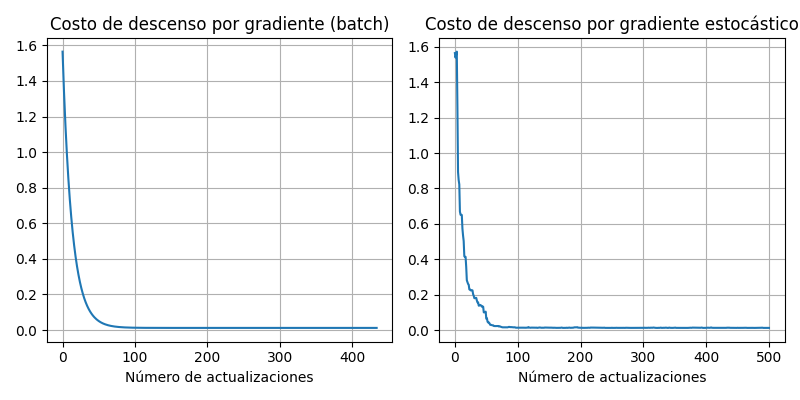

In [15]:
###################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

ws_bgd = minimos_cuadrados_mediante_descenso_por_gradiente(X, y,max_iter=max_iter_BGD)
errores_bgd = evolucion_costo_descenso_por_gradiente(X, y, ws_bgd)

ws_sgd = minimos_cuadrados_mediante_descenso_por_gradiente_estocastico(X, y,max_epocas=max_epocas_SGD)
errores_sgd = evolucion_costo_descenso_por_gradiente(X, y, ws_sgd)

###################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(errores_bgd)
plt.title("Costo de descenso por gradiente (batch)")
plt.xlabel("Número de actualizaciones")
plt.grid()
plt.subplot(122)
plt.plot(errores_sgd)
plt.title("Costo de descenso por gradiente estocástico")
plt.xlabel("Número de actualizaciones")
plt.grid()
plt.tight_layout()

## Evolución de los pesos en descenso por gradiente

La siguiente celda muestra cómo evolucionan los pesos durante la optimización. Correrla, mirar la animación y utilizarla para explicar el desempeño de ambos métodos.

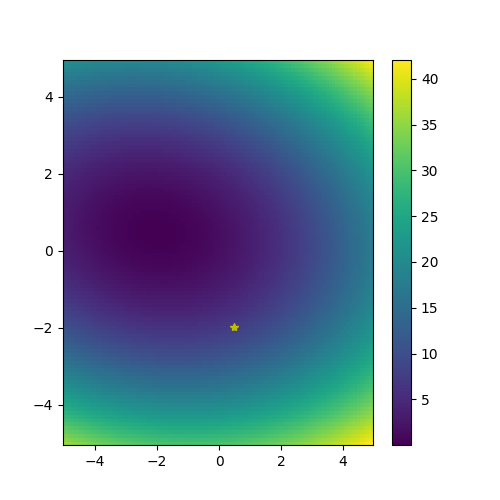

In [16]:
fig = plt.figure(figsize=(5, 5))
cost_ax = fig.gca()
cost_ax.plot(w_ls[1], w_ls[0], "y*")

ms = np.arange(-5.0, 5, 0.1)
ns = np.arange(-5.0, 5, 0.1)
mm, nn = np.meshgrid(ms, ns)
costo = np.zeros_like(mm)
for n in range(N):
    costo += 1 / N * (y[n] - (mm * x[n] + nn)) ** 2

cost_img = cost_ax.pcolor(mm, nn, costo, shading="auto")
fig.colorbar(cost_img)


def animar(i):

    cost_ax.cla()
    cost_ax.plot(w_ls[1], w_ls[0], "y*")
    cost_ax.pcolor(mm, nn, costo)
    cost_ax.plot(ws_bgd[:i, 1], ws_bgd[:i, 0], "r--")
    cost_ax.plot(ws_sgd[:i, 1], ws_sgd[:i, 0], "g--")

    cost_ax.set_xlim([-3, 2])
    cost_ax.set_ylim([-2, 2])

    cost_ax.set_xlabel(r"$m$")
    cost_ax.set_ylabel(r"$n$")
    cost_ax.set_title("Actualización %d" % i)

    cost_ax.legend(("Solucion cerrada", "BGD", "SGD"), loc="upper left")
    # plt.tight_layout()


nIters = int(np.min([ws_bgd.shape[0], ws_sgd.shape[0]]))
animacion = FuncAnimation(fig, animar, frames=nIters, interval=1, repeat=False)
plt.show()

**(e)**  ¿Coinciden las soluciones de los distintos métodos? A modo de resumen comentar en qué  casos le parece conveniente utilizar cada uno de los métodos.  

**Respuesta:**   

...

# Ejercicio 3:  Regresión Logística
<a id="Ejercicio3"></a>

En un problema de dos clases, el modelo de regresión logística asume que la probabilidad a posteriori de pertenencia a la clase positiva puede ser escrita de la siguiente forma:

$$
P(y=1|\mathbf{x}_n;\mathbf{w})= \theta \left( \mathbf{w}^T\mathbf{x}_n \right)= \frac{1}{1+\exp\left(-\left(\mathbf{w}^T\mathbf{x}_n\right)\right)}
$$

donde $\mathbf{x_n}=\left( 1, x_{n1},x_{n2},...,x_{nd}\right)$ es el n-ésimo vector de característcas expresado en coordenadas homogéneas y $d$ es el número de característcas.  

**(a)** Mostrar que $P(y=y_n|\mathbf{x}_n;\mathbf{w}) = \frac{1}{1+\exp\left(-\left(y_n \mathbf{w}^T\mathbf{x}_n\right)\right)} $

**Solución:**

...

**(b)** Escribir la log verosimilitud $l(\mathbf{y}| \mathbf{X};\mathbf{w})$ para este modelo en función de la función $\theta(\cdot)$ definida anteriormente. $\mathbf{X}$ es una matriz de $N \times (d+1)$ e $\mathbf{y}$ es un vector que contiene las $N$ etiquetas.

**Solución:**

...

**(c)** Mostrar que encontrar el $\mathbf{w}$ que maximiza la verosimilitud es equivalente a encontrar el $\mathbf{w}$ que minimiza la función de costo: 

$$
E_{in}(\mathbf{w}) = \frac{1}{N}\sum_{n=1}^N \log \left( 1 + \exp \left( -y_n \mathbf{w}^T\mathbf{x}_n \right) \right)
$$

**Solución:**

...

**(d)** Mostrar que $$\nabla E_{in}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^{N} -y_n \mathbf{x}_n \theta  \left( - y_n \mathbf{w}^T\mathbf{x_n} \right) $$

**Respuesta:**    
...


**(e)** Implementar el método `regresion_logistica()` utilizando alguna de las variantes del método de descenso por gradiente para realizar la optimización

In [113]:
def regresion_logistica(X, y, lr=0.1, max_iter=1000, delta_w_minimo=1e-7):
    """
    Entrada:
        X: matríz de tamaño Nx(d+1) donde cada fila representa una muestra
        y: vector de tamaño N que contiene las etiquetas
        lr: learning rate
        max_iter: si el número de iteraciones alcanza a max_iter se detiene la
                  optimización.
        delta_w_minimo: si la norma L2 del vector diferencia entre vectores de pesos de
                        dos iteraciones consecutivos es menor que delta_w_minimo se
                        detiene la optimización
    Salida:
        w: vector de pesos encontrado
        error: vector de error de tamaño igual al número de iteraciones
    """

    # se inicializan los pesos a valores aleatorios muy pequeños
    w = 1e-6 * np.random.randn(X.shape[1])
    error = []

    ###################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    '''
    w_i = w
    it = 0
    delta_w = 1000000
    err = 0
    while (it < max_iter and delta_w > delta_w_minimo):
        
        gt=0
        for n in range(N):
            gt=gt-y[n]*X[n,:]*(1/(1+np.e**(y[n]*w@X[n,:])))
        gt=gt/N

        grad = 0
        for n in range(N):
            wxy = -y[n] * w_i @ X[n,:] # y[n] es etiqueta, w es vector, X[n,:] es el vector de X asociado al dato n
            tita = 1/(1+np.e**(wxy))
            grad = (-y[n] * X [n,:]) * tita
        grad = grad/n
        w = w_i - lr*grad.T
        delta_w = np.linalg.norm(w_i-w)
        w_i = w
        it=it+1
        for n in range(N):
            err=err+np.log(1+np.e**(-y[n]*w@X[n,:]))
        err=err/N
        error.append(err)
        '''
    i=0
    delta_w=1
    N=X.shape[0]
    while ((i<max_iter)and(delta_w>delta_w_minimo)):
        gt=0
        for n in range(N):
            gt=gt-y[n]*X[n,:]*(1/(1+np.e**(y[n]*w@X[n,:])))
        gt=gt/N
        vt=-gt
        w=w+lr*vt
        delta_w=np.linalg.norm(lr*vt)
        err=0
        for n in range(N):
            err=err+np.log(1+np.e**(-y[n]*w@X[n,:]))
        err=err/N
        error.append(err)
        i=i+1

    ###################################################################
    ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################

    return w, error

## Clasificación de Iris

En esta sección se aplicará el modelo de Regresión Logística para clasificar a la flor de Iris. La [base de datos Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) es una de las más conocidas en el área de aprendizaje automático por ser una de las primeras en ser introducidas a la comunidad. El problema original consiste en utilizar cuatro características de las flores (ancho y alto del pétalo y del sépalo) para separar en tres especies diferentes: Virgínica, Versicolor, Setosa.

Se utilizarán los datos disponibles en el [repositorio UCI](https://archive.ics.uci.edu/ml/datasets/iris). La siguiente celda levanta los datos y grafica las características dos a dos.

In [114]:
data = np.loadtxt("data/iris.data", delimiter=",", usecols=[0, 1, 2, 3])
labels = np.loadtxt("data/iris.data", delimiter=",", usecols=[4], dtype=str)
features_names = ["sepal length", "sepal width", "petal length", "petal width"]
labels_names = ["Virginica", "Versicolor", "Setosa"]
N, d = data.shape

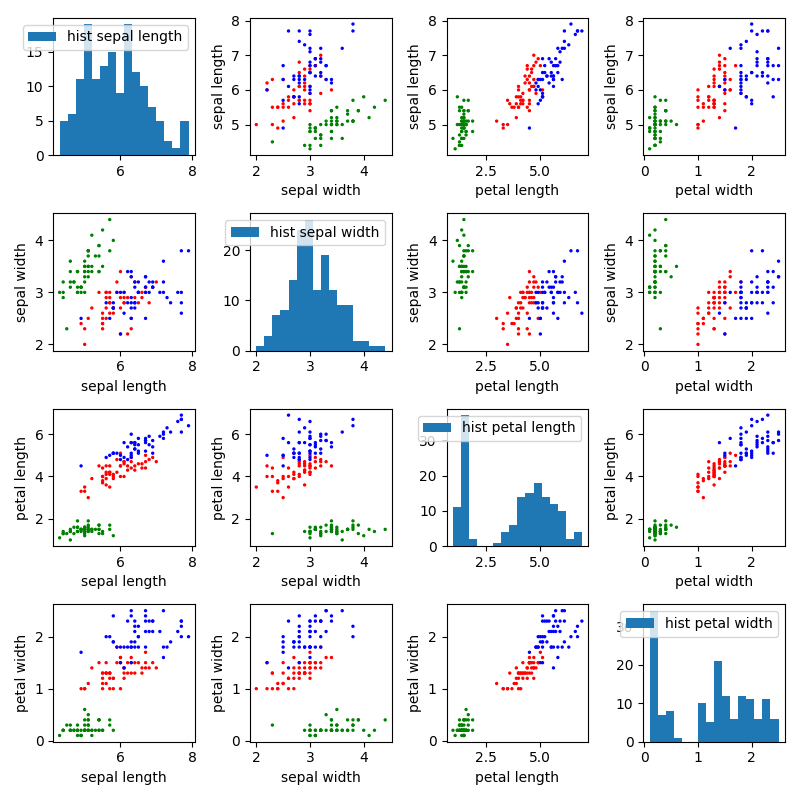

In [115]:
mapa_colores = {"Iris-versicolor": "r", "Iris-virginica": "b", "Iris-setosa": "g"}
colores = [mapa_colores[l] for l in labels]
N, F = data.shape
plt.figure(figsize=(8, 8))
for i in range(F):
    for j in range(F):
        plt.subplot(4, 4, 1 + i * F + j)
        if i != j:
            plt.scatter(data[:, j], data[:, i], s=2, c=colores)
            plt.xlabel(features_names[j])
            plt.ylabel(features_names[i])
        else:
            plt.hist(data[:, i], bins=16, label="hist %s" % features_names[i])
            plt.legend()
plt.tight_layout()

En este ejercicio se separarán las fores de Iris en dos categorías distintas. Se provee la función `preprocesar_iris()` que separa a las especies en dos, asignándoles la etiqueta +1 o -1 y dejándolas prontas para ser utilizadas por la función `regresion_logistica()`.

In [116]:
def preprocesar_iris(
    data, labels, clasesPositivas, clasesNegativas, features=[0, 1, 2, 3]
):
    """
    Entrada:
        data: arreglo de tamaño (N,d) con las características de las N muestras
        labels: arreglo de tamaño (N,) con las N etiquetas asignadas a las muestras
        clasesPositivas: lista de etiquetas que van a asignarse a la clase positiva
        clasesNegativas: lista de etiquetas que van a asignarse a la clase negativa
        features: lista de características a utilizar. Por defecto se usan todas
    Salida:
        X: arreglo de tamaño (N,d+1) con las características a utilizar
        y: vector de N etiquetas, valen +1 o -1
    """

    # se transforma a coordenadas homogéneas
    X = np.concatenate((np.ones((N, 1)), data[:, features]), axis=1)
    y = np.zeros(len(labels))
    for clase in clasesPositivas:
        labels_c = labels == clase
        y[labels_c] = 1
    for clase in clasesNegativas:
        labels_c = labels == clase
        y[labels_c] = -1

    return X, y

## Separación de Iris-virgínica utilizando una característica

Elegir la característica que considere más discriminatoria y utilícela para separar la clase Iris-virgínica de las demás.

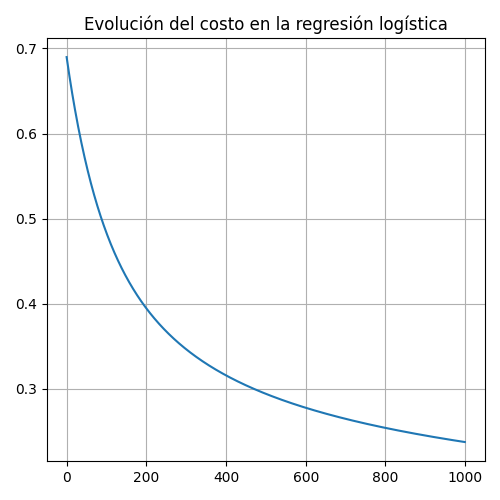

In [117]:
clasesPositivas = ["Iris-virginica"]
clasesNegativas = ["Iris-setosa", "Iris-versicolor"]

## ATENCIÓN: La clase Iris-setosa es linealmente separable de las demás utilizando
## una sola característica por lo que puede ser útil para verificar el correcto
## funcionamiento del método regresión logística
# clasesPositivas=['Iris-setosa']
# clasesNegativas=['Iris-virginica','Iris-versicolor' ]

###################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

# Se elige la característica más discriminatoria y se obtienen los datos para
# esa característica

features=[3]
Xiris1, y = preprocesar_iris(data, labels, clasesPositivas, clasesNegativas, features)

# Se determinan los parámetros del modelo de regresión logística
w_iris1, error= regresion_logistica(Xiris1, y, lr = 0.1, max_iter=1000, delta_w_minimo=1e-7)

# Se calcula el umbral de decisión como el valor en que la probabilidad de pertenecer
# a ambas clases es la misma.
umbral = -w_iris1[0]/w_iris1[1]

# Se determinan los parámetros del modelo de regresión logística


# Se calcula el umbral de decisión como el valor en que la probabilidad de pertenecer
# a ambas clases es la misma. 

###################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

plt.figure(figsize=(5, 5))
plt.plot(error)
plt.title("Evolución del costo en la regresión logística")
plt.grid()
plt.tight_layout()

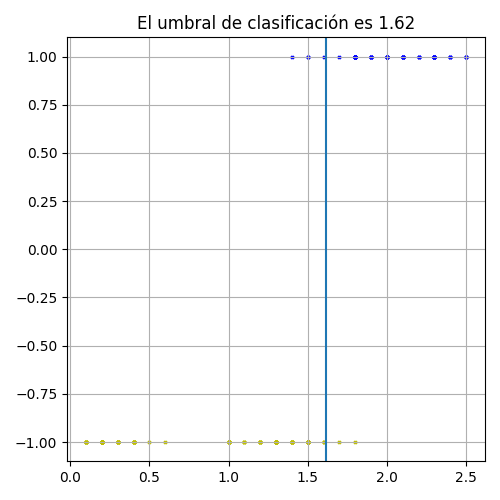

In [118]:
def mostrar_umbral_clasificacion_iris1D(Xiris, y, umbral):
    """
    Entrada:
        Xiris: Matríz de Nx2 que contiene los features en coordenadas homogéneas
        y: vector de etiquetas con valores 1 o -1
        umbral: umbral de decisión enocontrado mediante regresión logística
    """
    plt.figure(figsize=(5, 5))
    plt.scatter(
        Xiris[y == -1, 1], y[y == -1], s=4, c="y", marker="x", label="negativas"
    )
    plt.scatter(Xiris[y == 1, 1], y[y == 1], s=4, c="b", marker="x", label="positivas")
    plt.axvline(umbral)
    plt.title("El umbral de clasificación es %.02f" % umbral)
    plt.grid()
    plt.tight_layout()


mostrar_umbral_clasificacion_iris1D(Xiris1, y, umbral)

A diferencia de otros métodos de clasificación, la clasificación mediante regresión logística brinda, para cada muestra, una probabilidad de pertencia a una determinada clase. Implementar el método `predecir_probabilidad_modelo_logistico()` y muestre las curvas de probabilidad de pertenencia a cada clase.

In [119]:
def predecir_probabilidad_modelo_logistico(X, w):
    """
    Entrada:
        X: arreglo de tamaño (N,d+1) que contiene las características de N muestras
           en coordenadas homogéneas
        w: arreglo de tamaño (d+1,) con los pesos estimados por modelo logístico
    Salida:
        probabilidades: arreglo de tamaño (N,2) que en la primera columna almacena la probabilidad
                        de pertenencia a la clase positiva y en la segunda la de pertenencia a
                        la clase negativa
    """

    ###################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    N=X.shape[0]
    probabilidades = np.zeros((N,2))
    probabilidades[:,0]=1/(1+np.e**(-X@w))
    probabilidades[:,1]=1/(1+np.e**(X@w))

    ###################################################################
    ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    
    return probabilidades

Ejecutar la siguiente celda y verificar que el modelo encontrado es razonable

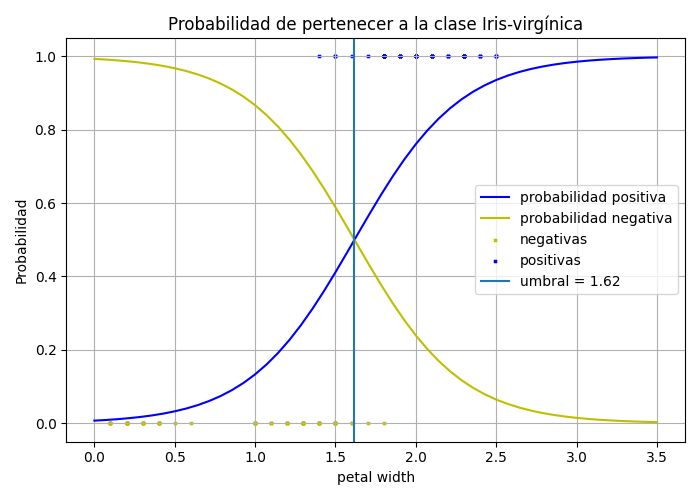

In [120]:
# Se muestra el modelo en función de la característica elegida
x = np.linspace(0, Xiris1[:, 1].max() + 1)
xh = np.hstack((np.ones((len(x), 1)), x[:, np.newaxis]))
probs = predecir_probabilidad_modelo_logistico(xh, w_iris1)

plt.figure(figsize=(7, 5))
plt.plot(x, probs[:, 0], c="b", label="probabilidad positiva")
plt.plot(x, probs[:, 1], c="y", label="probabilidad negativa")
plt.scatter(
    Xiris1[y == -1, 1], 0 * y[y == -1], s=4, c="y", marker="x", label="negativas"
)
plt.scatter(Xiris1[y == 1, 1], y[y == 1], s=4, c="b", marker="x", label="positivas")

plt.axvline(umbral, label="umbral = %.02f" % umbral)
plt.legend()
plt.grid()
plt.xlabel(features_names[features[0]])
plt.ylabel("Probabilidad")
plt.title("Probabilidad de pertenecer a la clase Iris-virgínica")
plt.tight_layout()

## Separación de Iris-virgínica utilizando dos característica

Elegir ahora las dos características que considere más discriminatorias y utilícelas para separar la clase Iris-virgínica de las demás. Comente como varía la solucón obtenida en función de los parámetros de optimización del modelo. Para visualizar el modelo obtenido puede ser útil la función `mostrar_lineas_de_nivel_modelo_logisitco()`.

In [121]:
def mostrar_lineas_de_nivel_modelo_logisitco(X, w_rl):
    """
    Este método muestra las líneas de isoprobabilidad en el caso de características 2D
    Entrada:
        X: arreglo de tamaño (N,3) que en cada fila contiene una muestra (en coordenadas homogéneas)
        w_rl: arreglo unidimensional obtenido mediante regresión logística
    """
    plt.figure()
    x1_min = X[:, 1].min()
    x1_max = X[:, 1].max()
    x2_min = X[:, 2].min()
    x2_max = X[:, 2].max()
    xx = np.linspace(x1_min, x1_max)
    yy = np.linspace(x2_min, x2_max)
    XX, YY = np.meshgrid(xx, yy)
    Zin = np.vstack((np.ones(XX.size), XX.flatten(), YY.flatten())).T
    Z = predecir_probabilidad_modelo_logistico(Zin, w_rl)
    ZZ = np.reshape(Z[:, 0], XX.shape)

    plt.scatter(X[y == 1, 1], X[y == 1, 2], s=2, c="b", label="positivas")
    plt.scatter(X[y == -1, 1], X[y == -1, 2], s=2, c="y", label="negativas")

    cs = plt.contour(XX, YY, ZZ, [0.1, 0.25, 0.5, 0.75, 0.9])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.xlabel(features_names[features[0]])
    plt.ylabel(features_names[features[1]])
    plt.axis("equal")
    plt.legend()

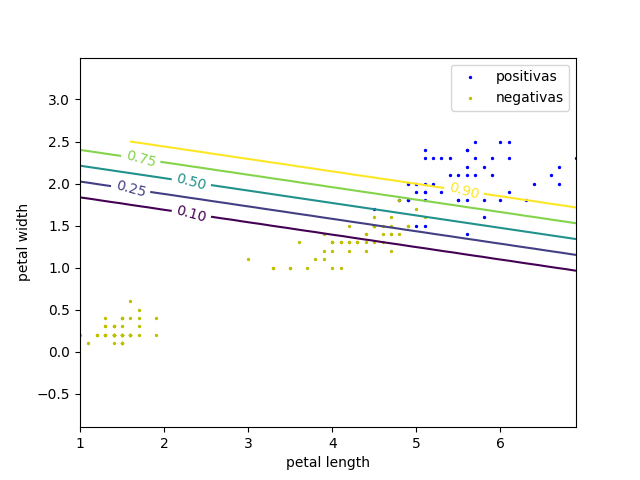

In [124]:
###################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

# Se eligen las características que se consideran más discriminativas
# features=[0, 1] (por ejemplo)
features=[2, 3] 

Xiris2, y2 = preprocesar_iris(data, labels, clasesPositivas, clasesNegativas, features)


# Se entrena el modelo y se muestran los resultados

w_iris2, error= regresion_logistica(Xiris2, y2, lr = 0.1, max_iter=10000, delta_w_minimo=1e-7)

mostrar_lineas_de_nivel_modelo_logisitco(Xiris2, w_iris2)

###################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

# Ejercicio 4: Compromiso Sesgo Varianza
<a id="Ejercicio4"></a>

El error fuera de la muestra se define como 

$$
E_{out}(g^{(\mathcal{D})})=\mathtt{E}_{\mathbf{x}}\left[ (g^{\mathcal{D}}(\mathbf{x}) - f(\mathbf{x}))^2 \right],
$$

donde $\mathtt{E}_{\mathbf{x}}$ denota el valor esperado respecto a $\mathbf{x} \in \mathcal{X}$ y la esperanza se toma</font> sobre la distribución de probabilidad del espacio de entrada $\mathcal{X}$. En la expresión anterior se hizo explícita la dependencia de la hipótesis final $g$ respecto a los datos $\mathcal{D}$ ya que tomar en cuenta esa dependencia es medular para el análisis sesgo-varianza. Para obtener un resultado que sea independiente del conjunto de datos utilizado para obtener $g$ es necesario tomar la esperanza respecto a todos los posibles conjuntos de datos, es decir 

\begin{align}
\mathtt{E}_{\mathcal{D}} \left[ E_{out}(g^{(\mathcal{D})}) \right] & = \mathtt{E}_{\mathcal{D}} \left[ \mathtt{E}_{\mathbf{x}}\left[ (g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x}))^2 \right]\right]  \\ 
& = \mathtt{E}_{\mathbf{x}} \left[\mathtt{E}_{\mathcal{D}}  \left[ (g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x}))^2 \right]\right] \\
\end{align}

## Parte (a)

Se define $\bar{g}(\mathbf{x}) =  \mathtt{E}_{\mathcal{D}}\left[ (g^{\mathcal{(D)}}(\mathbf{x})\right] $.¿Cómo puede interpretarse $\bar{g}(\mathbf{x})$ ? 

**Respuesta:** ...

## Parte (b) 

Si se definen: 

$$ 
bias(\mathbf{x})=(\bar{g}(\mathbf{x})-f(\mathbf{x}))^2
$$

$$ 
var(\mathbf{x})=\mathtt{E}_{\mathcal{D}}\left[ (g^{\mathcal{(D)}}(\mathbf{x}) - \bar{g}(\mathbf{x}))^2 \right]
$$


Mostrar que 

\begin{align}
\mathtt{E}_{\mathcal{D}} \left[ E_{out}(g^{(\mathcal{D})}) \right] & = \mathtt{E}_{\mathbf{x}} \left[ bias(\mathbf{x}) + var(\mathbf{x})  \right]  \\
& = bias + var, \\
\end{align}

donde $bias=\mathtt{E}_{\mathbf{x}} \left[ bias(\mathbf{x}) \right]$ y $var=\mathtt{E}_{\mathbf{x}} \left[ var(\mathbf{x}) \right]$

*Sugerencia:* puede resultar útil sumar y restar $\bar{g}$ en $\mathtt{E}_{\mathcal{D}}  \left[ (g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x}))^2 \right]$.</font> 

**Respuesta:** ...

### Experimento

Se considera la función $f(x)=\sin(\pi x)$ y un conjunto de datos de tamaño $N=2$. Se propone encontrar la mejor hipótesis $g$ utilizando los puntos $(x_1,y_1)$ y $(x_2,y_2)$, para cada uno de los siguientes conjuntos de hipótesis:

\begin{align}
\mathcal{H}_0: & \text{ Conjunto de todas las líneas de la forma } h(x)=b  \\
\mathcal{H}_1: & \text{ Conjunto de todas las líneas de la forma } h(x)=ax + b
\end{align}

Para $\mathcal{H_0}$  se considera como hipótesis que mejor se ajusta a los datos a $b=\frac{y_1+y_2}{2}$. Para $\mathcal{H_1}$ se considera la recta que pasa por los puntos $(x_1,y_1)$ y $(x_2,y_2)$.

## Parte (c)
Completar la función `obtener_hipotesis()`

In [163]:
def obtener_hipotesis(x1, y1, x2, y2, hipotesis):
    """
    Entrada:
        x1: arreglo de largo (K,) con las coordenadas en x de los puntos1 de K experimentos
        y1: arreglo de largo (K,) con las coordenadas en y de los puntos1 de K experimentos
        x2: arreglo de largo (K,) con las coordenadas en x de los puntos2 de K experimentos
        y2: arreglo de largo (K,) con las coordenadas en y de los puntos2 de K experimentos
        hipotesis: conjunto de hipótesis 'H0' o 'H1'
    Salida:
        a: arreglo de largo (K,) con los valores de a calculados para cada par (puntos1, puntos2)
        b: arreglo de largo (K,) con los valores de b calculados para cada par (puntos1, puntos2)
    """

    ###################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    a=np.zeros(len(x1))
    b=np.zeros(len(x1))
    for i in range(len(x1)):  
        a_i = 0
        b_i = 0
        if (hipotesis == 'H0') : 
            b[i] = np.minimum(y1[i],y2[i]) + np.abs(y1[i]-y2[i])/2
        if (hipotesis == 'H1') :
            der = y1[i]-y2[i]
            dif = x1[i]-x2[i]
            a_i = der/dif
            b_i = -der/dif+y1[i]
        a[i] = a_i
        b[i] = b_i

    ###################################################################
    ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    return a, b

## Parte (d)

Completar la función `calcular_sesgo_varianza()`. Para ello tomar en cuenta que si se obtienen $g_1, \ldots , g_K $ hipótesis finales luego de aplicar el mismo algoritmo de aprendizaje sobre  $\mathcal{D}_1, \ldots, \mathcal{D}_K$ conjuntos de datos distintos, es razonable estimar $\bar{g}(\mathbf{x})$ como

$$
\bar{g}(\mathbf{x}) = \frac{1}{K} \sum_{k=1}^{K} g_k(\mathbf{x})
$$

In [164]:
def calcular_sesgo_varianza(x_test, a, b):
    """
    Entrada:
        x_test: arreglo de tamaño (K,) a utilizar como conjunto de test
        a: arreglo de tamaño (K,) con coeficientes a de K experimentos
        b: arreglo de tamaño (K,) con coeficientes b de K experimentos
    Salida:
        sesgo:
        varianza:
    """

    ###################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    k = len(x_test)
    g_techo = np.zeros(k)
    for j in range(len(x_test)):#me muevo en x
        for i in range (k):#me muevo en todas las h encontradas
            g_k = (a[i]*x_test[j] + b[i])/k
            g_techo[j] = g_techo[j] + g_k
    sesgo = np.zeros (k)
    for j in range (len(x_test)):
        sesgo[j] = (g_techo[j] - np.sin(np.pi * x_test[j]))**2
    varianza = np.zeros(k)
    for j in range (len(x_test)):
        varianza[j] = (x_test[j] - g_techo[j])**2

    ###################################################################
    ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################

    return sesgo, varianza

## Parte (e)

Ejecutar la siguiente celda y a partir de lo obsevado indique cuál de los modelos prefiere en términos del error esperado fuera de la muestra. Inspeccione el código y asegúrese de entener qué representan las distintas curvas.

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
C:\Users\savila\AppData\Local\Temp\ipykernel_61296\420303380.py:17: SyntaxWarning: invalid escape sequence '\p'
  """


TypeError: only length-1 arrays can be converted to Python scalars

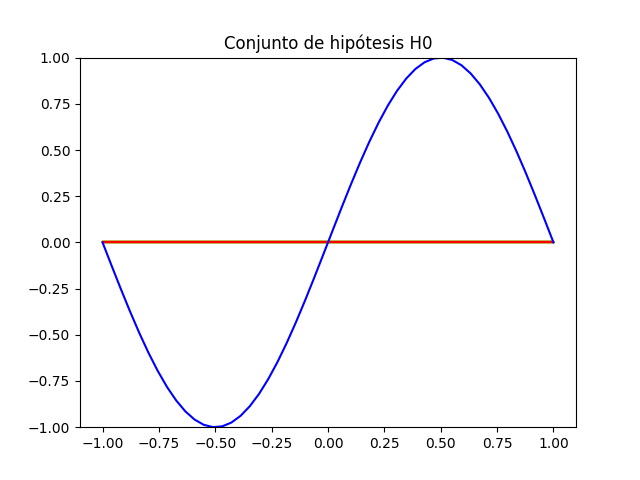

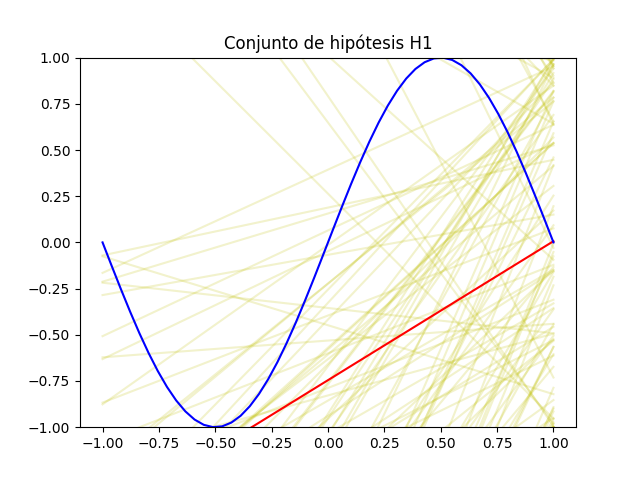

In [165]:
def mostrar_experimento(a, b, nombre_experimento):

    x = np.linspace(-1, 1)

    N = len(a)
    plt.figure()
    for n in range(0, N, N // 100):
        plt.plot(x, a[n] * x + b[n], "y", alpha=0.2)

    plt.plot(x, a.mean() * x + b.mean(), "r")
    plt.plot(x, np.sin(np.pi * x), "b")
    plt.ylim(-1, 1)
    plt.title(nombre_experimento)


def realizar_experimentos(K):
    """
    Se realizan K experimentos y se estima el sesgo y la varianza de
    los conjuntos H0 y H1 al aproximar sin(\pi x) en el intervalo [-1,1]
    con dos puntos
    """

    # Se sortean aleatoriamente K pares (x1,y1) y K pares (x2,y2)
    x1 = 2 * np.random.rand(K) - 1
    x2 = 2 * np.random.rand(K) - 1
    y1 = np.sin(np.pi * x1)
    y2 = np.sin(np.pi * x2)

    # Se encuentran los coef a y b del modelo H0
    a0, b0 = obtener_hipotesis(x1, y1, x2, y2, "H0")
    mostrar_experimento(a0, b0, "Conjunto de hipótesis H0")
    
    # Se encuentran los coef a y b del modelo H1
    a1, b1 = obtener_hipotesis(x1, y1, x2, y2, "H1")
    mostrar_experimento(a1, b1, "Conjunto de hipótesis H1")

    # Se define el conjunto de test
    N_test = 1000
    x_test = 2 * np.random.rand(N_test) - 1

    bias0, variance0 = calcular_sesgo_varianza(x_test, a0, b0)
    print("Para H0: sesgo = %f,  varianza = %f" % (bias0, variance0))

    bias1, variance1 = calcular_sesgo_varianza(x_test, a1, b1)
    print("Para H1: sesgo = %f,  varianza = %f" % (bias1, variance1))


realizar_experimentos(10000)